In [ ]:
# Install necessary packages
# !pip install pennylane tqdm  # for google collab



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.7 MB/s eta 0:00:00


In [3]:
import os
import pandas as pd
import pennylane as qml
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader
#from google.colab import drive
from tqdm import tqdm


In [4]:
DATA_DIR = "/mnt/c/Users/sudee/OneDrive/Desktop/quantum-boltzman-machine-for-financial-stock-prediction/Quantum-Boltzmann-Machine-QBM-for-Financial-Market-Prediction/Data/Stocks"


In [5]:
# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [6]:
# Load data
all_data = []
for file in os.listdir(DATA_DIR):
    if file.endswith(".txt"):
        file_path = os.path.join(DATA_DIR, file)
        if os.path.getsize(file_path) == 0:
            print(f"Skipping empty file: {file}")
            continue
        try:
            df = pd.read_csv(file_path, sep=",", header=0, on_bad_lines="skip", encoding="utf-8")
            df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
            if df.isnull().all().all():
                print(f"Skipping invalid file: {file}")
                continue
            all_data.append(df)
            print(f"Loaded: {file}, Shape: {df.shape}")
        except Exception as e:
            print(f"Error loading {file}: {e}")


Loaded: a.us.txt, Shape: (4521, 7)
Loaded: aa.us.txt, Shape: (12074, 7)
Loaded: aaap.us.txt, Shape: (505, 7)
Loaded: aaba.us.txt, Shape: (5434, 7)
Loaded: aac.us.txt, Shape: (785, 7)
Loaded: aal.us.txt, Shape: (989, 7)
Loaded: aamc.us.txt, Shape: (1211, 7)
Loaded: aame.us.txt, Shape: (2926, 7)
Loaded: aan.us.txt, Shape: (3201, 7)
Loaded: aaoi.us.txt, Shape: (1041, 7)
Loaded: aaon.us.txt, Shape: (3201, 7)
Loaded: aap.us.txt, Shape: (3201, 7)
Loaded: aapl.us.txt, Shape: (8364, 7)
Loaded: aat.us.txt, Shape: (1717, 7)
Loaded: aau.us.txt, Shape: (3177, 7)
Loaded: aav.us.txt, Shape: (3199, 7)
Loaded: aaww.us.txt, Shape: (3162, 7)
Loaded: aaxn.us.txt, Shape: (3201, 7)
Loaded: ab.us.txt, Shape: (3201, 7)
Loaded: abac.us.txt, Shape: (1827, 7)
Loaded: abax.us.txt, Shape: (3201, 7)
Loaded: abb.us.txt, Shape: (3201, 7)
Loaded: abbv.us.txt, Shape: (1224, 7)
Loaded: abc.us.txt, Shape: (5691, 7)
Loaded: abcb.us.txt, Shape: (3201, 7)
Loaded: abcd.us.txt, Shape: (1970, 7)
Loaded: abco.us.txt, Shape: (3

In [7]:
# Combine all data
df = pd.concat(all_data, ignore_index=True)

In [8]:

# Feature selection
features = ["Close", "Open", "High", "Low", "Volume"]
target = "Close"
X = df[features]
y = df[target]

In [9]:
# Normalize data
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [10]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [11]:

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32).to(device)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [12]:
# DataLoader setup
batch_size = 1024
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(TensorDataset(X_valid_tensor, y_valid_tensor), batch_size=batch_size)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size)


In [13]:
# Define quantum device
dev = qml.device("default.qubit", wires=4)

def qbm_circuit(params):
    for i in range(4):
        qml.RY(params[i], wires=i)
        qml.RX(params[i+4], wires=i)
        qml.RZ(params[i+8], wires=i)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    return [qml.expval(qml.PauliZ(i)) for i in range(4)]

qnode = qml.QNode(qbm_circuit, dev, interface="torch")

class QuantumBoltzmannMachine(nn.Module):
    def __init__(self):
        super().__init__()
        self.params = nn.Parameter(0.01 * torch.randn(12, device=device))
        self.fc1 = nn.Linear(len(features) + 4, 128).to(device)
        self.fc2 = nn.Linear(128, 64).to(device)
        self.fc3 = nn.Linear(64, 1).to(device)
        self.batch_norm1 = nn.BatchNorm1d(128)
        self.batch_norm2 = nn.BatchNorm1d(64)

    def forward(self, x):
        q_output = qnode(self.params)
        q_output = torch.tensor(q_output, dtype=torch.float32, requires_grad=True, device=device) / 10
        x = torch.cat([x, q_output.repeat(x.size(0), 1)], dim=1)
        x = torch.relu(self.batch_norm1(self.fc1(x)))
        x = torch.relu(self.batch_norm2(self.fc2(x)))
        return self.fc3(x)

model = QuantumBoltzmannMachine().to(device)
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)


In [14]:
num_epochs = 30
best_valid_loss = float("inf")
print("Training on", device)
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch) * 100
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {avg_train_loss:.4f}")

Training on cuda


Epoch 1/30: 100%|██████████| 10178/10178 [04:37<00:00, 36.71it/s]


Epoch 1/30 - Train Loss: 1.4870


Epoch 2/30: 100%|██████████| 10178/10178 [04:13<00:00, 40.16it/s]


Epoch 2/30 - Train Loss: 1.1370


Epoch 3/30: 100%|██████████| 10178/10178 [03:57<00:00, 42.90it/s]


Epoch 3/30 - Train Loss: 1.1232


Epoch 4/30: 100%|██████████| 10178/10178 [03:53<00:00, 43.54it/s]


Epoch 4/30 - Train Loss: 1.2995


Epoch 5/30: 100%|██████████| 10178/10178 [04:01<00:00, 42.13it/s]


Epoch 5/30 - Train Loss: 0.7967


Epoch 6/30: 100%|██████████| 10178/10178 [03:53<00:00, 43.66it/s]


Epoch 6/30 - Train Loss: 0.9488


Epoch 7/30: 100%|██████████| 10178/10178 [04:01<00:00, 42.23it/s]


Epoch 7/30 - Train Loss: 1.1353


Epoch 8/30: 100%|██████████| 10178/10178 [04:15<00:00, 39.91it/s]


Epoch 8/30 - Train Loss: 1.4183


Epoch 9/30: 100%|██████████| 10178/10178 [04:06<00:00, 41.34it/s]


Epoch 9/30 - Train Loss: 1.5549


Epoch 10/30: 100%|██████████| 10178/10178 [04:13<00:00, 40.21it/s]


Epoch 10/30 - Train Loss: 1.5547


Epoch 11/30: 100%|██████████| 10178/10178 [04:17<00:00, 39.56it/s]


Epoch 11/30 - Train Loss: 1.5549


Epoch 12/30: 100%|██████████| 10178/10178 [04:14<00:00, 39.96it/s]


Epoch 12/30 - Train Loss: 1.5546


Epoch 13/30: 100%|██████████| 10178/10178 [04:23<00:00, 38.62it/s]


Epoch 13/30 - Train Loss: 1.5548


Epoch 14/30: 100%|██████████| 10178/10178 [04:38<00:00, 36.58it/s]


Epoch 14/30 - Train Loss: 0.9853


Epoch 15/30: 100%|██████████| 10178/10178 [04:41<00:00, 36.15it/s]


Epoch 15/30 - Train Loss: 1.5546


Epoch 16/30: 100%|██████████| 10178/10178 [04:37<00:00, 36.71it/s]


Epoch 16/30 - Train Loss: 1.1000


Epoch 17/30: 100%|██████████| 10178/10178 [04:48<00:00, 35.25it/s]


Epoch 17/30 - Train Loss: 0.9737


Epoch 18/30: 100%|██████████| 10178/10178 [04:34<00:00, 37.07it/s]


Epoch 18/30 - Train Loss: 0.9574


Epoch 19/30: 100%|██████████| 10178/10178 [04:20<00:00, 39.13it/s]


Epoch 19/30 - Train Loss: 0.9551


Epoch 20/30: 100%|██████████| 10178/10178 [04:28<00:00, 37.93it/s]


Epoch 20/30 - Train Loss: 0.6050


Epoch 21/30: 100%|██████████| 10178/10178 [04:10<00:00, 40.59it/s]


Epoch 21/30 - Train Loss: 0.6139


Epoch 22/30: 100%|██████████| 10178/10178 [04:16<00:00, 39.64it/s]


Epoch 22/30 - Train Loss: 0.9574


Epoch 23/30: 100%|██████████| 10178/10178 [04:18<00:00, 39.38it/s]


Epoch 23/30 - Train Loss: 1.0090


Epoch 24/30: 100%|██████████| 10178/10178 [04:40<00:00, 36.33it/s]


Epoch 24/30 - Train Loss: 1.0406


Epoch 25/30: 100%|██████████| 10178/10178 [05:15<00:00, 32.28it/s] 


Epoch 25/30 - Train Loss: 0.9522


Epoch 26/30: 100%|██████████| 10178/10178 [04:04<00:00, 41.56it/s]


Epoch 26/30 - Train Loss: 1.1479


Epoch 27/30: 100%|██████████| 10178/10178 [04:15<00:00, 39.77it/s]


Epoch 27/30 - Train Loss: 1.5547


Epoch 28/30: 100%|██████████| 10178/10178 [04:25<00:00, 38.32it/s]


Epoch 28/30 - Train Loss: 1.1469


Epoch 29/30: 100%|██████████| 10178/10178 [04:14<00:00, 39.99it/s]


Epoch 29/30 - Train Loss: 1.7557


Epoch 30/30: 100%|██████████| 10178/10178 [04:15<00:00, 39.83it/s]

Epoch 30/30 - Train Loss: 2.3095


In [ ]:
# Save model
MODEL_PATH = "best_qbm_model.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f"Model saved to {os.path.abspath(MODEL_PATH)}")


In [3]:
MODEL_PATH = "best_qbm_model.pth"

In [ ]:
# Load and test model
model.load_state_dict(torch.load(MODEL_PATH))
model.eval()
test_loss = 0.0
all_predictions, all_actuals = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        predictions = model(X_batch)
        test_loss += criterion(predictions, y_batch).item()
        all_predictions.extend(predictions.cpu().numpy())
        all_actuals.extend(y_batch.cpu().numpy())
test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")


/home/sudeepkumar/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


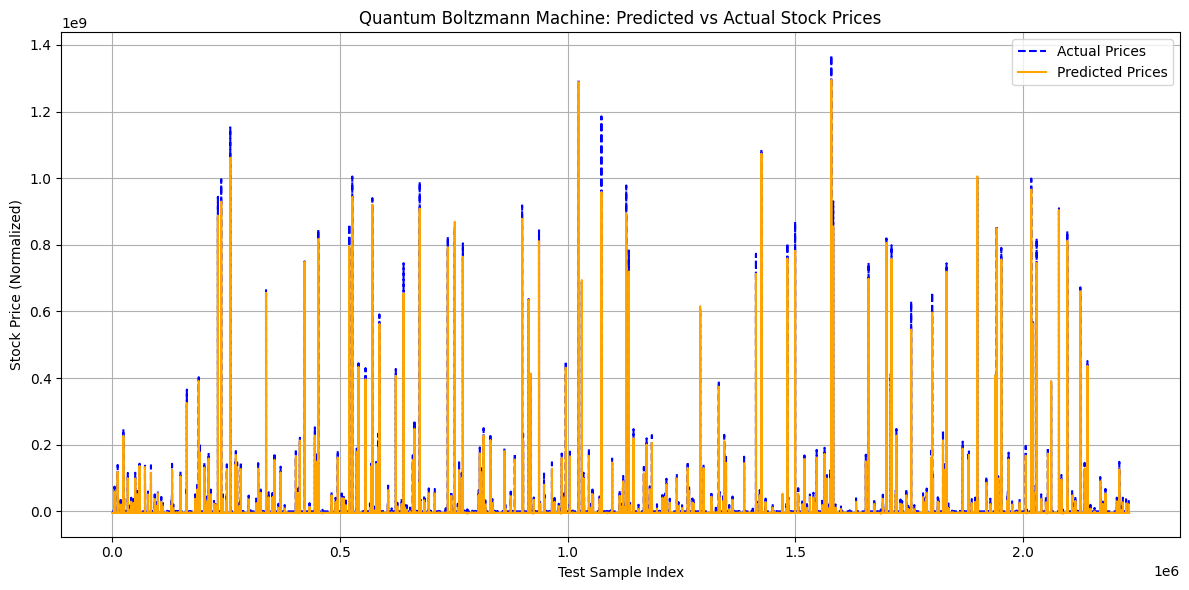

In [22]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(all_actuals, label="Actual Prices", linestyle='dashed', color='blue')
plt.plot(all_predictions, label="Predicted Prices", linestyle='solid', color='orange')
plt.legend()
plt.xlabel("Test Sample Index")
plt.ylabel("Stock Price (Normalized)")
plt.title("Quantum Boltzmann Machine: Predicted vs Actual Stock Prices")
plt.grid(True)
plt.tight_layout()

plt.show()

